# Plots and analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pingouin as pg

from functions import sig, alter_sig, sigfit, alter_sigfit

pd.options.mode.chained_assignment = None  # Stop seeing warnings

In [2]:
df = pd.read_pickle("data/df")

## Comparing means of LDL and HL between HA and control across frequencies
- T-test LDL per group per frequency
- LDL mean per group per frequency (pointplot)
- LDL mean per group per frequency (boxplot)
- T-test HL per group per frequency
- HL mean per group per frequency (pointplot)
- HL mean per group per frequency (boxplot)

### Preprocessing for this area

In [3]:
df = df[
    [
        "Código de participante",
        "Group",
        "TWI",
        "OPI",
        "LDL_250",
        "LDL_500",
        "LDL_1000",
        "LDL_2000",
        "LDL_4000",
        "LDL_8000",
        "LDL_Ear",
        "HL_250_R",
        "HL_500_R",
        "HL_1000_R",
        "HL_2000_R",
        "HL_4000_R",
        "HL_8000_R",
        "HL_250_L",
        "HL_500_L",
        "HL_1000_L",
        "HL_2000_L",
        "HL_4000_L",
        "HL_8000_L",
        "HL_250",
        "HL_500",
        "HL_1000",
        "HL_2000",
        "HL_4000",
        "HL_8000",
        "Avg_LDL",
        "Avg_HL_L",
        "Avg_HL_R",
        "Avg_HL",
        "AQ_TOTAL",
    ]
]

Cannot run with NaN values, so I will drop them by now. However, in the oficial running, Nan participants should be eliminated by now and thus the following cell shouldnt run

In [4]:
df.dropna(inplace=True)
df.sample(10)

,Código de participante,Group,TWI,OPI,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,...,HL_500,HL_1000,HL_2000,HL_4000,HL_8000,Avg_LDL,Avg_HL_L,Avg_HL_R,Avg_HL,AQ_TOTAL
28,AC22,HA,117.883198,0.146667,70.0,65.0,65.0,65.0,65.0,70.0,...,5.0,15.0,0.0,0.0,10.0,66.666667,10.833333,6.666667,6.666667,4.0
55,GC006,Control,154.292812,0.100000,35.0,35.0,35.0,40.0,45.0,35.0,...,5.0,0.0,5.0,0.0,15.0,37.500000,10.833333,5.000000,5.000000,2.0
56,GC007,Control,96.582238,0.226667,65.0,75.0,70.0,75.0,75.0,75.0,...,0.0,-5.0,5.0,-5.0,0.0,72.500000,-1.666667,1.666667,-1.666667,4.0
14,AC08,HA,114.249866,0.306667,80.0,75.0,75.0,80.0,80.0,65.0,...,0.0,0.0,0.0,5.0,-10.0,75.833333,0.000000,2.500000,0.000000,3.0
50,GC001,Control,190.209289,0.693333,40.0,45.0,45.0,50.0,40.0,20.0,...,0.0,0.0,0.0,-5.0,-10.0,40.000000,-1.666667,0.833333,-1.666667,1.0
59,GC010,Control,190.699980,0.773333,35.0,35.0,55.0,35.0,25.0,35.0,...,5.0,5.0,-5.0,0.0,0.0,36.666667,4.166667,1.666667,1.666667,4.0
17,AC11,HA,121.067219,0.140000,65.0,90.0,90.0,90.0,90.0,80.0,...,10.0,5.0,10.0,15.0,-5.0,84.166667,7.500000,9.166667,7.500000,6.0
38,AC32,HA,156.353259,0.540000,100.0,110.0,110.0,110.0,110.0,100.0,...,25.0,25.0,10.0,10.0,15.0,106.666667,17.500000,18.333333,18.333333,2.0
12,AC06,HA,228.092147,0.473333,80.0,100.0,120.0,115.0,115.0,100.0,...,5.0,5.0,-5.0,0.0,-10.0,105.000000,0.000000,1.666667,0.000000,7.0
8,AC02,HA,100.299235,0.293333,80.0,100.0,85.0,85.0,85.0,90.0,...,5.0,10.0,5.0,10.0,15.0,87.500000,9.166667,11.666667,9.166667,6.0


### Loudness Discomfort Level (LDL) between groups

#### Preprocessing for these plots

In [5]:
df_pointplots = df[
    [
        "Código de participante",
        "Group",
        "LDL_250",
        "LDL_500",
        "LDL_1000",
        "LDL_2000",
        "LDL_4000",
        "LDL_8000",
        "LDL_Ear",
        "HL_250_R",
        "HL_500_R",
        "HL_1000_R",
        "HL_2000_R",
        "HL_4000_R",
        "HL_8000_R",
        "HL_250_L",
        "HL_500_L",
        "HL_1000_L",
        "HL_2000_L",
        "HL_4000_L",
        "HL_8000_L",
        "HL_250",
        "HL_500",
        "HL_1000",
        "HL_2000",
        "HL_4000",
        "HL_8000",
        "AQ_TOTAL",
    ]
]

In [6]:
# Split groups
df_pointplots_HA = df_pointplots[df_pointplots["Group"] == "HA"]
df_pointplots_control = df_pointplots[df_pointplots["Group"] == "Control"]

# Melt for HA
df_pointplots_HA = pd.melt(
    df_pointplots_HA,
    id_vars=["Código de participante", "AQ_TOTAL"],
    value_vars=["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
)
df_pointplots_HA["Group"] = "HA"

# Melt for control
df_pointplots_control = pd.melt(
    df_pointplots_control,
    id_vars=["Código de participante", "AQ_TOTAL"],
    value_vars=["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
)
df_pointplots_control["Group"] = "Control"

# Concat
df_pointplots_ldl = pd.concat([df_pointplots_HA, df_pointplots_control])

df_pointplots_ldl

,Código de participante,AQ_TOTAL,variable,value,Group
0,AC01,5.0,LDL_250,60.0,HA
1,AC02,6.0,LDL_250,80.0,HA
2,AC03,5.0,LDL_250,80.0,HA
3,AC05,7.0,LDL_250,80.0,HA
4,AC06,7.0,LDL_250,80.0,HA
...,...,...,...,...,...
25,GC001,1.0,LDL_8000,20.0,Control
26,GC006,2.0,LDL_8000,35.0,Control
27,GC007,4.0,LDL_8000,75.0,Control
28,GC008,4.0,LDL_8000,20.0,Control


In [7]:
# Rename columns
df_pointplots_ldl.columns = ["ID", "AQ", "Frequency", "Db", "Group"]

In [8]:
pg.mixed_anova(
    data=df_pointplots_ldl, dv="Db", between="Group", within="Frequency", subject="ID"
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,27126.736111,1,18,27126.736111,12.351996,0.002475,NaN,0.406958,NaN,NaN,NaN,NaN
1,Frequency,3063.541667,5,90,612.708333,7.128097,0.000012,0.000262,0.283670,0.620417,False,0.243015,0.045222
2,Interaction,237.847222,5,90,47.569444,0.553411,0.735333,NaN,0.029828,NaN,NaN,NaN,NaN


<Axes: xlabel='AQ', ylabel='Db'>

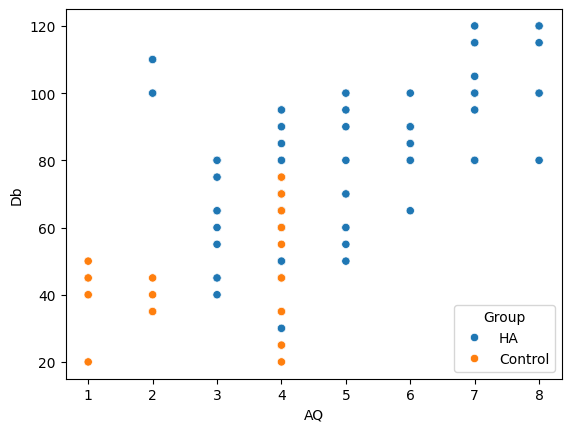

In [9]:
sns.scatterplot(x="AQ", y="Db", hue="Group", data=df_pointplots_ldl)

In [10]:
%load_ext rpy2.ipython

In [75]:
%%R
library(lme4) #Requires Matrix==1.6-5
library(jtools)
library(equatiomatic)

In [12]:
%%R -i df_pointplots_ldl

df_pointplots_ldl

       ID AQ Frequency  Db   Group
1    AC01  5   LDL_250  60      HA
2    AC02  6   LDL_250  80      HA
3    AC03  5   LDL_250  80      HA
4    AC05  7   LDL_250  80      HA
5    AC06  7   LDL_250  80      HA
6    AC08  3   LDL_250  80      HA
7    AC11  6   LDL_250  65      HA
8    AC14  8   LDL_250  80      HA
9    AC17  3   LDL_250  45      HA
10   AC19  4   LDL_250  50      HA
11   AC21  4   LDL_250  80      HA
12   AC22  4   LDL_250  70      HA
13   AC30  4   LDL_250  75      HA
14   AC32  2   LDL_250 100      HA
15   AC34  4   LDL_250  60      HA
16   AC01  5   LDL_500  60      HA
17   AC02  6   LDL_500 100      HA
18   AC03  5   LDL_500 100      HA
19   AC05  7   LDL_500  95      HA
20   AC06  7   LDL_500 100      HA
21   AC08  3   LDL_500  75      HA
22   AC11  6   LDL_500  90      HA
23   AC14  8   LDL_500 100      HA
24   AC17  3   LDL_500  55      HA
25   AC19  4   LDL_500  60      HA
26   AC21  4   LDL_500  75      HA
27   AC22  4   LDL_500  65      HA
28   AC30  4   LDL_5

/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


In [99]:
%%R -i df_pointplots_ldl

model <- lmer(Db ~ Group*Frequency + AQ + (1 + AQ|ID), data=df_pointplots_ldl, REML=FALSE)
#model <- lmer(Db ~ Group*Frequency + AQ + (1 + AQ|ID) + (1 + AQ|Frequency), data=df_pointplots_ldl, REML=FALSE)
#model <- lmer(Db ~ Group*Frequency + AQ + (1|ID), data=df_pointplots_ldl, REML=FALSE)
#model <- lmer(Db ~ Group*Frequency + AQ + (1 + Frequency|ID), data=df_pointplots_ldl, REML=FALSE) # Error
summ(model)
#eq = extract_eq(model, wrap=TRUE, terms_per_line = 2, operator_location = "start")
#eq

MODEL INFO:
Observations: 120
Dependent Variable: Db
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 949.16, BIC = 996.55
Pseudo-R² (fixed effects) = 0.56
Pseudo-R² (total) = 0.90 

FIXED EFFECTS:
-------------------------------------------------------------------------
                                    Est.    S.E.   t val.     d.f.      p
------------------------------- -------- ------- -------- -------- ------
(Intercept)                        25.59   14.85     1.72    13.76   0.11
GroupHA                            20.50   12.63     1.62    25.63   0.12
FrequencyLDL_2000                  -6.00    5.86    -1.02   112.55   0.31
FrequencyLDL_250                   -9.00    5.86    -1.54   112.55   0.13
FrequencyLDL_4000                 -11.00    5.86    -1.88   112.55   0.06
FrequencyLDL_500                   -6.00    5.86    -1.02   112.55   0.31
FrequencyLDL_8000                 -16.00    5.86    -2.73   112.55   0.01
AQ                                  8.40    3.17     2

boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')


In [14]:
# Explore based on :
# https://jontalle.web.engr.illinois.edu/MISC/lme4/bw_LME_tutorial.pdf
# - https://mypage.concordia.ca/faculty/pperesne/BIOL_422_680/L17_Slides.pdf
# - https://stats.stackexchange.com/questions/476176/difference-between-repeated-measures-anova-ancova-and-linear-mixed-effects-mode
# - https://stats.stackexchange.com/questions/13166/rs-lmer-cheat-sheet

#### T tests

In [15]:
df_pointplots.head(5)

,Código de participante,Group,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,LDL_Ear,HL_250_R,...,HL_2000_L,HL_4000_L,HL_8000_L,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000,AQ_TOTAL
7,AC01,HA,60.0,60.0,70.0,70.0,50.0,55.0,L,20.0,...,10.0,15.0,20.0,10.0,10.0,10.0,10.0,15.0,20.0,5.0
8,AC02,HA,80.0,100.0,85.0,85.0,85.0,90.0,L,10.0,...,5.0,10.0,15.0,10.0,5.0,10.0,5.0,10.0,15.0,6.0
9,AC03,HA,80.0,100.0,90.0,95.0,100.0,100.0,L,20.0,...,5.0,5.0,5.0,10.0,10.0,5.0,5.0,5.0,5.0,5.0
11,AC05,HA,80.0,95.0,100.0,105.0,100.0,80.0,L,5.0,...,5.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0,7.0
12,AC06,HA,80.0,100.0,120.0,115.0,115.0,100.0,L,0.0,...,-5.0,0.0,-10.0,5.0,5.0,5.0,-5.0,0.0,-10.0,7.0


In [16]:
df_HA = df_pointplots[df_pointplots["Group"] == "HA"]
df_Control = df_pointplots[df_pointplots["Group"] == "Control"]

freqs = ["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(pg.ttest(df_HA[frequency], df_Control[frequency]))

t test for LDL_250


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.256847,7.760868,two-sided,0.002972,"[12.9, 43.76]",2.057522,49.922,0.96439


t test for LDL_500


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.853272,7.875916,two-sided,0.005001,"[13.6, 54.4]",1.848445,24.624,0.922617


t test for LDL_1000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.396219,9.896078,two-sided,0.001377,"[16.91, 51.76]",1.900684,63.95,0.935514


t test for LDL_2000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.772493,9.904465,two-sided,0.003709,"[14.98, 58.35]",1.63045,21.428,0.847355


t test for LDL_4000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.392327,8.816034,two-sided,0.008211,"[12.8, 64.53]",1.54165,11.303,0.805943


t test for LDL_8000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.002646,7.882868,two-sided,0.017293,"[8.36, 64.31]",1.439747,6.059,0.75078


#### Plots

In [17]:
df_pointplots_ldl.dropna()

,ID,AQ,Frequency,Db,Group
0,AC01,5.0,LDL_250,60.0,HA
1,AC02,6.0,LDL_250,80.0,HA
2,AC03,5.0,LDL_250,80.0,HA
3,AC05,7.0,LDL_250,80.0,HA
4,AC06,7.0,LDL_250,80.0,HA
...,...,...,...,...,...
25,GC001,1.0,LDL_8000,20.0,Control
26,GC006,2.0,LDL_8000,35.0,Control
27,GC007,4.0,LDL_8000,75.0,Control
28,GC008,4.0,LDL_8000,20.0,Control


/tmp/ipykernel_4819/638573422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


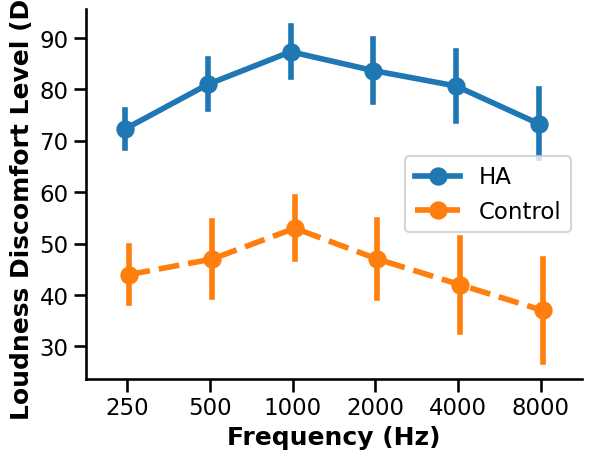

In [18]:
sns.set_context("talk")

fig = sns.pointplot(
    data=df_pointplots_ldl,
    x="Frequency",
    y="Db",
    hue="Group",
    linestyles=["-", "--"],
    errorbar="se",
    dodge=True,
)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel(
    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

/tmp/ipykernel_4819/3367796261.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


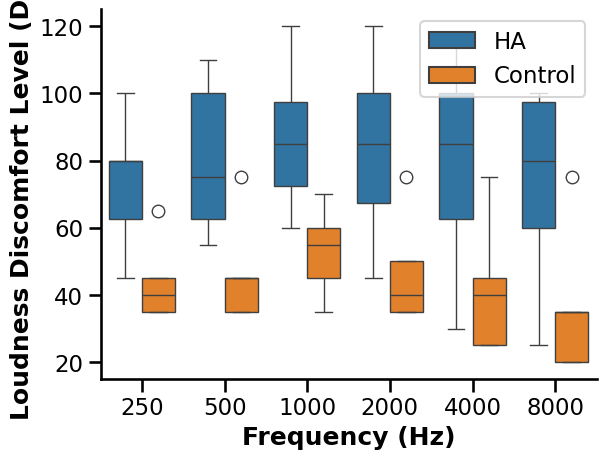

In [19]:
sns.set_context("talk")
fig = sns.boxplot(
    data=df_pointplots_ldl, x="Frequency", y="Db", hue="Group", dodge=True
)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel(
    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

### Hearing Level (HL) between groups

#### Preprocessing
dataset must be in melt form

In [20]:
df_pointplots.head(5)

,Código de participante,Group,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,LDL_Ear,HL_250_R,...,HL_2000_L,HL_4000_L,HL_8000_L,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000,AQ_TOTAL
7,AC01,HA,60.0,60.0,70.0,70.0,50.0,55.0,L,20.0,...,10.0,15.0,20.0,10.0,10.0,10.0,10.0,15.0,20.0,5.0
8,AC02,HA,80.0,100.0,85.0,85.0,85.0,90.0,L,10.0,...,5.0,10.0,15.0,10.0,5.0,10.0,5.0,10.0,15.0,6.0
9,AC03,HA,80.0,100.0,90.0,95.0,100.0,100.0,L,20.0,...,5.0,5.0,5.0,10.0,10.0,5.0,5.0,5.0,5.0,5.0
11,AC05,HA,80.0,95.0,100.0,105.0,100.0,80.0,L,5.0,...,5.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0,7.0
12,AC06,HA,80.0,100.0,120.0,115.0,115.0,100.0,L,0.0,...,-5.0,0.0,-10.0,5.0,5.0,5.0,-5.0,0.0,-10.0,7.0


In [21]:
# Split groups
df_pointplots_HA = df_pointplots[df_pointplots["Group"] == "HA"]
df_pointplots_control = df_pointplots[df_pointplots["Group"] == "Control"]

# Melt for HA
df_pointplots_HA = pd.melt(
    df_pointplots_HA,
    id_vars=["Código de participante"],
    value_vars=["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
)
df_pointplots_HA["Group"] = "HA"

# Melt for control
df_pointplots_control = pd.melt(
    df_pointplots_control,
    id_vars=["Código de participante"],
    value_vars=["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
)
df_pointplots_control["Group"] = "Control"

# Concat
df_pointplots_hl = pd.concat([df_pointplots_HA, df_pointplots_control])

df_pointplots_hl

,Código de participante,variable,value,Group
0,AC01,HL_250,10.0,HA
1,AC02,HL_250,10.0,HA
2,AC03,HL_250,10.0,HA
3,AC05,HL_250,5.0,HA
4,AC06,HL_250,5.0,HA
...,...,...,...,...
25,GC001,HL_8000,-10.0,Control
26,GC006,HL_8000,15.0,Control
27,GC007,HL_8000,0.0,Control
28,GC008,HL_8000,5.0,Control


In [22]:
df_pointplots_hl.columns = ["ID", "Frequency", "Db", "Group"]

#### T-tests

In [23]:
df_HA = df_pointplots[df_pointplots["Group"] == "HA"]
df_Control = df_pointplots[df_pointplots["Group"] == "Control"]

freqs = ["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(pg.ttest(df_HA[frequency], df_Control[frequency]))

t test for HL_250


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.630468,10.682894,two-sided,0.132102,"[-1.54, 10.2]",0.68358,1.017,0.240676


t test for HL_500


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.641086,17.384072,two-sided,0.118746,"[-1.04, 8.37]",0.563055,1.028,0.178326


t test for HL_1000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.259525,14.814081,two-sided,0.005353,"[2.76, 13.24]",1.207571,9.101,0.599752


t test for HL_2000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.234582,8.186188,two-sided,0.251248,"[-2.58, 8.58]",0.580948,0.715,0.186826


t test for HL_4000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.474158,9.974437,two-sided,0.032926,"[0.59, 11.41]",1.066228,2.791,0.497731


t test for HL_8000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.137896,7.647303,two-sided,0.893884,"[-10.57, 11.91]",0.067166,0.439,0.051743


#### Plots

/tmp/ipykernel_4819/504455651.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


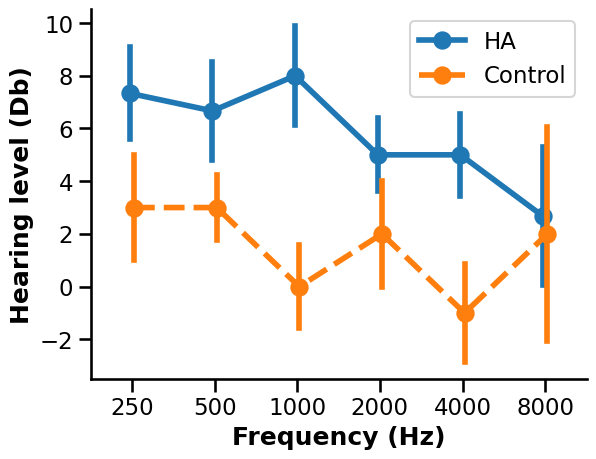

In [24]:
sns.set_context("talk")

fig = sns.pointplot(
    data=df_pointplots_hl,
    x="Frequency",
    y="Db",
    hue="Group",
    linestyles=["-", "--"],
    errorbar="se",
    dodge=True,
)
# plt.title("Hearing Level (Db) per Frequency (Hz)")
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
# plt.xticks(['HL_250', 'HL_500', 'HL_1000', 'HL_2000', 'HL_4000', 'HL_8000'], [250, 'HL_500', 'HL_1000','HL_2000', 'HL_4000', 'HL_8000'])
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})
fig.set_ylabel("Hearing level (Db)", fontdict={"weight": "bold"})
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)

handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

/tmp/ipykernel_4819/3291600568.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


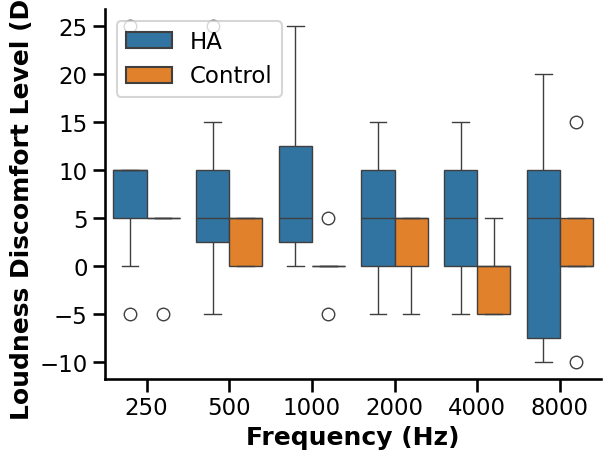

In [25]:
sns.set_context("talk")
fig = sns.boxplot(data=df_pointplots_hl, x="Frequency", y="Db", hue="Group")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel(
    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

## Comparing means of OPI and TWI between HA and control
- T-test OPI per group
- OPI per group (boxplot)
- T-test TWI per group
- TWI per group (boxplot)

In [26]:
df = pd.read_pickle("data/df")

In [27]:
df_HA = df[df["Group"] == "HA"]
df_Control = df[df["Group"] == "Control"]

measurement = "OPI"
print("t test for %s" % (measurement))
display(pg.ttest(df_HA[measurement], df_Control[measurement]))

t test for OPI

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.282516,6.080955,two-sided,0.786918,"[-0.37, 0.29]",0.174258,0.42,0.064943


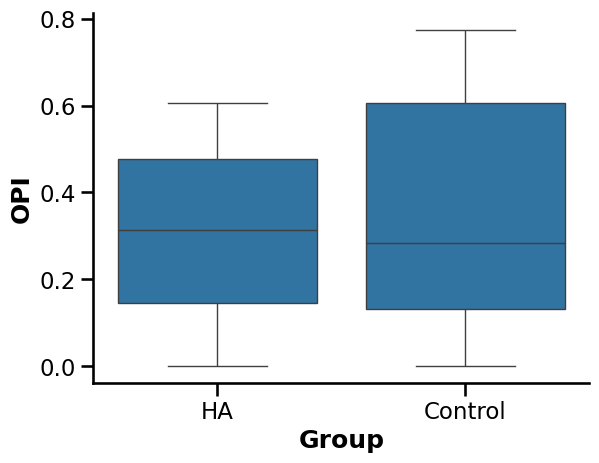

In [28]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="Group", y="OPI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("OPI", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={"weight": "bold"})

plt.show()

In [29]:
measurement = "TWI"
print("t test for %s" % (measurement))
display(pg.ttest(df_HA[measurement], df_Control[measurement]))

t test for TWI


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.196693,5.386765,two-sided,0.851276,"[-55.37, 47.34]",0.114123,0.435,0.055428


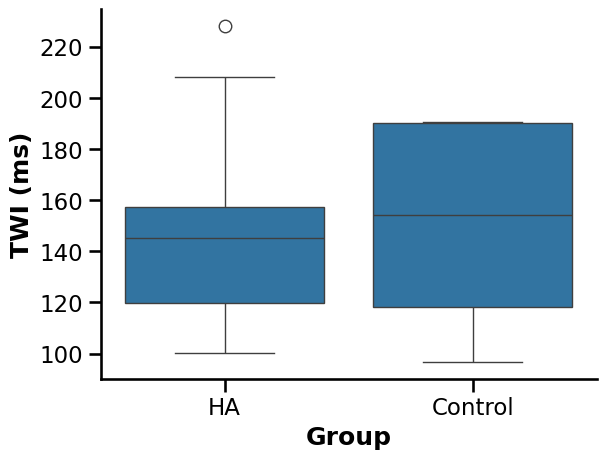

In [30]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="Group", y="TWI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("TWI (ms)", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={"weight": "bold"})

plt.show()

## Compare differences between AQ scoring between experimental and control
No significant differences

In [31]:
df_HA = df[df["Group"] == "HA"]
df_Control = df[df["Group"] == "Control"]


print("t test for AQ score")
display(pg.ttest(df_HA["AQ_TOTAL"], df_Control["AQ_TOTAL"]))

t test for AQ score


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.473372,8.705946,two-sided,0.175863,"[-0.62, 2.91]",0.693059,0.827,0.344834


## Group Sigmoid plot

### Preprocessing

In [32]:
df_sigmoid_fitted = pd.read_pickle("data/df_group_sigmoid_ha")

soas = [
    34.0,
    51.0,
    68.0,
    85.0,
    102.0,
    119.0,
    136.0,
    153.0,
    170.0,
    187.0,
    204.0,
    221.0,
    238.0,
    255.0,
    272.0,
]  # inter beep delay in experiment

In [33]:
# Generate the data for the plotsusing the fitted parameters
x = np.linspace(soas[0], soas[-1], 100)

index_of_control_group = 0
control = df_sigmoid_fitted.iloc[index_of_control_group].tolist()[1:-1]

index_of_HA_group = 1
ha = df_sigmoid_fitted.iloc[index_of_HA_group].tolist()[1:-1]

y_control = sig(x, *control)
y_ha = sig(x, *ha)

# Create a pandas DataFrame
df_control = pd.DataFrame({"x": x, "y": y_control})
df_ha = pd.DataFrame({"x": x, "y": y_ha})

### Plot

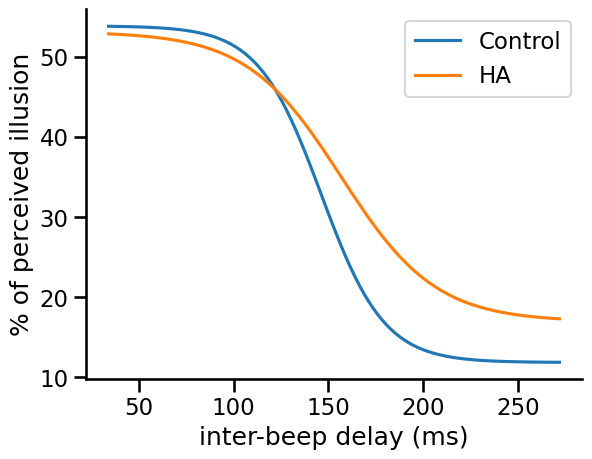

In [34]:
# Plot the sigmoid function
fig = sns.lineplot(data=df_control, x="x", y="y", label="Control")
fig = sns.lineplot(data=df_ha, x="x", y="y", label="HA")

plt.xlabel("inter-beep delay (ms)")
plt.ylabel("% of perceived illusion")
plt.legend()
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
plt.show()